## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Importing & understanding the DataSet

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
data.shape

(1460, 81)

In [5]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [34]:
df.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       111
LotArea          1073
Street              2
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 75, dtype: int64

## Handling Null values

In [6]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

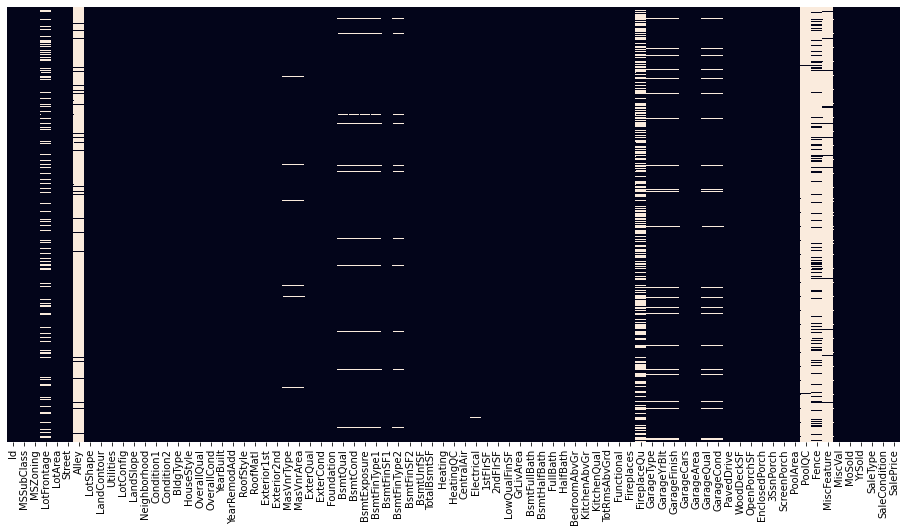

In [7]:
plt.figure(figsize=(16,8))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

In [8]:
data[data.columns[data.isnull().sum()!=0]].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [156]:
data[data.columns[data.isnull().sum()!=0]].isnull().sum().count()

19

In [9]:
data.columns[data.isnull().sum()>730]

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [3]:
df = data.drop(['Id'], axis=1)

In [4]:
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
df.shape

(1460, 76)

In [13]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
df.columns[df.isnull().sum()!=0]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

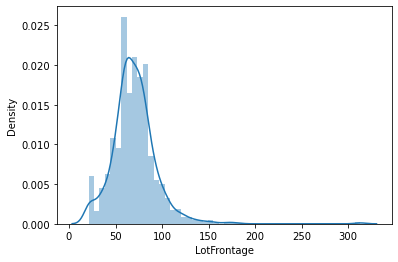

In [15]:
sns.distplot(df['LotFrontage'])

In [16]:
print('Mean:',df['LotFrontage'].mean())
print('Median:',df['LotFrontage'].median())

Mean: 70.04995836802665
Median: 69.0


In [5]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [18]:
df[df.columns[df.isnull().sum()!=0]].dtypes

MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

In [19]:
df[df.columns[df.isnull().sum()!=0]].nunique()

MasVnrType        4
MasVnrArea      327
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Electrical        5
FireplaceQu       5
GarageType        6
GarageYrBlt      97
GarageFinish      3
GarageQual        5
GarageCond        5
dtype: int64

In [6]:
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [21]:
df[df.columns[df.isnull().sum()!=0]].describe()

,MasVnrArea,GarageYrBlt
count,1452.000000,1379.000000
mean,103.685262,1978.506164
std,181.066207,24.689725
min,0.000000,1900.000000
25%,0.000000,1961.000000
50%,0.000000,1980.000000
75%,166.000000,2002.000000
max,1600.000000,2010.000000


In [7]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [8]:
df.drop(['MasVnrArea'], axis=1, inplace=True)

In [24]:
df.shape

(1460, 75)

<AxesSubplot:>

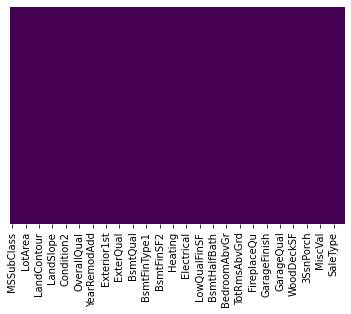

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Corelation Check

In [18]:
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.215828,0.043340,0.122156,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
BsmtFinSF1,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.140759,0.122156,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479


<AxesSubplot:>

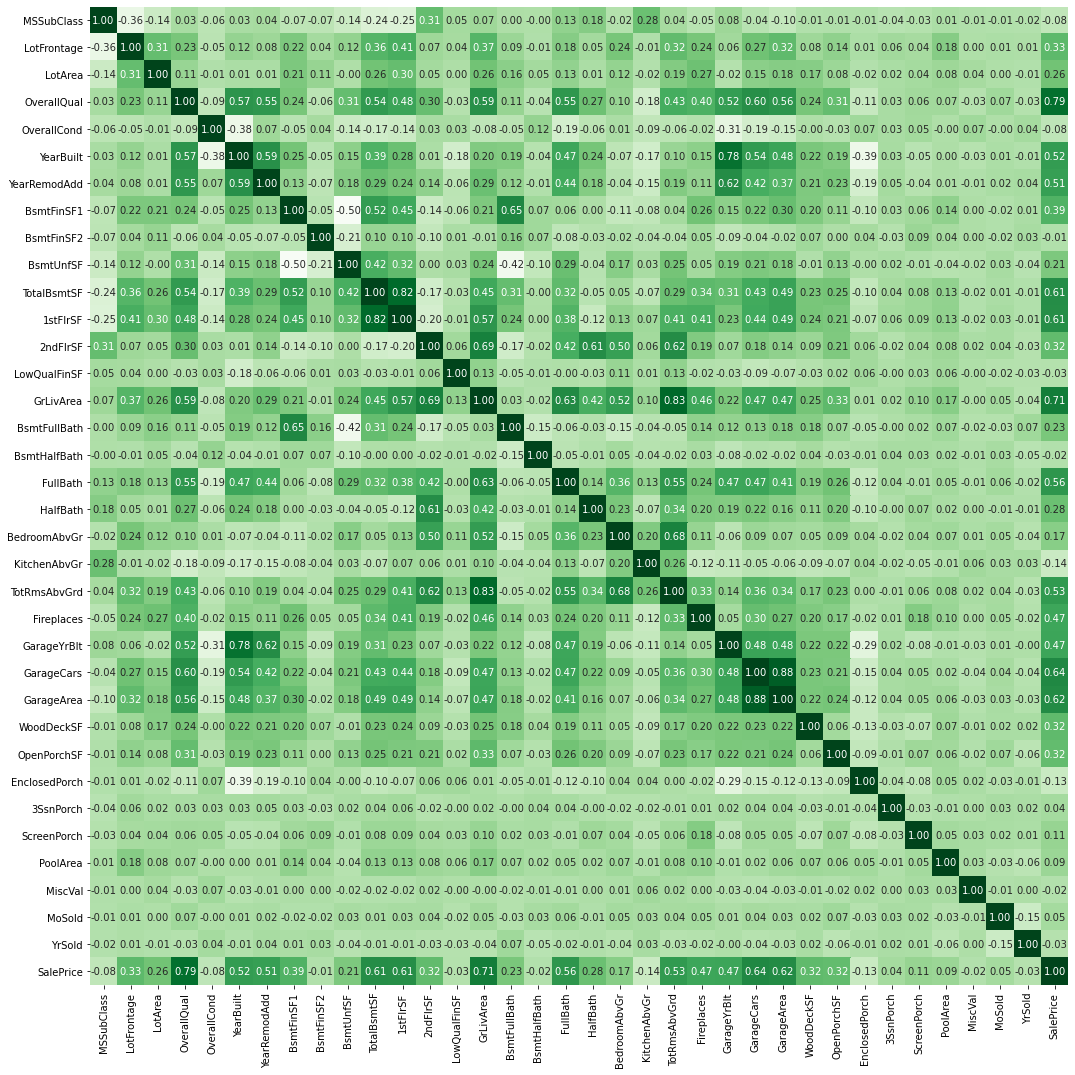

In [85]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), cbar=False, xticklabels=df.corr().columns, yticklabels=df.corr().columns, square=True, annot=True, fmt='0.2f', cmap='Greens')

In [121]:
corr_matrix = df.corr().abs()
high_corr_var = np.where(corr_matrix > 0.75)
high_corr_var = [(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('OverallQual', 'SalePrice'),
 ('YearBuilt', 'GarageYrBlt'),
 ('TotalBsmtSF', '1stFlrSF'),
 ('GrLivArea', 'TotRmsAbvGrd'),
 ('GarageCars', 'GarageArea')]

In [149]:
for i in corr_matrix[:-1].columns.values:
    for j in corr_matrix[:-1].index.values:
        if abs(corr_matrix[i][j]) > 0.75 and abs(corr_matrix[i][j]) != 1:
            print(f"Correlation between {i} and {j} is {round(corr_matrix[i][j]*100,2)}%")

Correlation between YearBuilt and GarageYrBlt is 78.06%
Correlation between TotalBsmtSF and 1stFlrSF is 81.95%
Correlation between 1stFlrSF and TotalBsmtSF is 81.95%
Correlation between GrLivArea and TotRmsAbvGrd is 82.55%
Correlation between TotRmsAbvGrd and GrLivArea is 82.55%
Correlation between GarageYrBlt and YearBuilt is 78.06%
Correlation between GarageCars and GarageArea is 88.25%
Correlation between GarageArea and GarageCars is 88.25%
Correlation between SalePrice and OverallQual is 79.1%


In [9]:
df.drop(['GarageYrBlt', 'GarageCars', 'TotalBsmtSF', 'GrLivArea'], axis=1, inplace=True)

In [151]:
df.shape

(1460, 71)

## Check for duplicate Rows

In [155]:
df[df.duplicated()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [66]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [157]:
df.shape

(1460, 71)

## Handling Categorical Features

In [33]:
df[df.columns[df.dtypes == object]].nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [17]:
for i in df:
    if (df[i].dtypes == 'object') & (df[i].nunique() == 2):
        print(i)

Street
Utilities
CentralAir


In [15]:
columns = df.columns[df.dtypes == object]
columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [37]:
len(columns)

39

### Concatenating the test dataset before handling categorical values

In [1]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 102C-9CE7

 Directory of C:\Users\Gaurab\Workspace\Capstone_Project\House_Price_Advance_Regression_Technique

11-02-2021  21:07    <DIR>          .
11-02-2021  21:07    <DIR>          ..
11-02-2021  13:00    <DIR>          .ipynb_checkpoints
15-12-2019  21:33            13,370 data_description.txt
11-02-2021  13:47           423,212 formulatedtest.csv
11-02-2021  21:07           806,649 House Price Advance Regression Technique.ipynb
10-02-2021  20:55           203,809 house-prices-advanced-regression-techniques.zip
10-09-2019  19:59    <DIR>          Kaggle-Competitions-master
10-02-2021  21:16           119,125 Kaggle-Competitions-master.zip
15-12-2019  21:33            31,939 sample_submission.csv
15-12-2019  21:33           451,405 test.csv
11-02-2021  13:48            62,535 Test_data.ipynb
15-12-2019  21:33           460,676 train.csv
               9 File(s)      2,572,720 bytes
               4 Dir(s)  178,700,824,576 byt

In [10]:
test_df = pd.read_csv('formulatedtest.csv')
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [11]:
train_df = df.copy()

In [12]:
final_df = pd.concat([train_df, test_df], axis=0)
final_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,NaN
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,NaN


In [13]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [14]:
final_df[final_df.columns[final_df.dtypes == object]].nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [15]:
len(final_df.columns[final_df.dtypes == object])

39

In [16]:
def one_hot_encoder(columns):
    df_final = final_df.copy()

    for i in columns:
        dummies = pd.get_dummies(df_final[i], drop_first=True, prefix=i)
        df_final = pd.concat([df_final, dummies], axis=1)
        df_final = df_final.drop(columns = [i], axis=1)
    
    return df_final

In [17]:
final_df = one_hot_encoder(columns)

In [53]:
final_df.shape

(2919, 232)

In [18]:
# remove duplicate columns(by column name)
final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [61]:
final_df.shape

(2919, 232)

In [56]:
final_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=232)

## Train-Test Split

In [27]:
from sklearn.model_selection import train_test_split

In [19]:
df_train = final_df.iloc[:1460,:]
df_test = final_df.iloc[1460:,:]

In [20]:
df_test.drop(['SalePrice'], axis=1, inplace=True)

In [81]:
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
2,60,74.0,13830,5,5,1997,1998,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
3,60,78.0,9978,6,6,1998,1998,602.0,0.0,324.0,...,0,0,0,0,1,0,0,0,1,0
4,120,43.0,5005,8,5,1992,1992,263.0,0.0,1017.0,...,0,0,0,0,1,0,0,0,1,0


In [82]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,706.0,0.0,150.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,978.0,0.0,284.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,486.0,0.0,434.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,216.0,0.0,540.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,655.0,0.0,490.0,...,0,0,0,0,1,0,0,0,1,0


In [26]:
x = df_train.drop(['SalePrice'], axis=1)
y = df_train['SalePrice']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Zero Variance Check

In [21]:
from sklearn.feature_selection import VarianceThreshold

In [22]:
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(df_train)

VarianceThreshold(threshold=0)

In [23]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [25]:
df_train.columns[var_thres.get_support() == False]

Index([], dtype='object')

## Auto-ML Using Lazy Predict Python Library

In [29]:
from lazypredict.Supervised import LazyRegressor

In [30]:
lreg = LazyRegressor()
models, predictions = lreg.fit(x_train, x_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [00:10<00:00,  4.04it/s]


,R-Squared,RMSE,Time Taken
Model,,,
ExtraTreesRegressor,0.89,28628.45,0.94
LGBMRegressor,0.88,30313.35,0.29
RandomForestRegressor,0.88,30921.96,1.24
HistGradientBoostingRegressor,0.87,30980.19,2.25
PoissonRegressor,0.87,31308.58,0.05
GradientBoostingRegressor,0.87,31391.87,0.46
XGBRegressor,0.85,34276.53,0.45
BaggingRegressor,0.85,34309.11,0.16
AdaBoostRegressor,0.83,35622.19,0.36


## Random Forest Classifier

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [145]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [146]:
print('Training Score: ', model_rf.score(x_train, y_train)*100, '%')
print('Testing Score: ', model_rf.score(x_test, y_test), '%')

Training Score:  100.0 %
Testing Score:  0.003424657534246575 %


In [37]:
accuracy_rf = model_rf.score(x_test, y_test)
accuracy_rf

0.003424657534246575

In [38]:
pred_rf = model_rf.predict(x_test)

## Hyperparameter Tuning

In [139]:
import time
from sklearn.model_selection import GridSearchCV

In [133]:
param_dist = {'max_depth': [6, 8, 10, 12, 14, 16, 18, 20],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(model_rf, cv = 10,
                     param_grid = param_dist, 
                     n_jobs = -1)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto'}


NameError: name 'time' is not defined

In [147]:
# Set best parameters given by grid search 
model_rf.set_params(bootstrap = True, 
                    criterion = 'gini', 
                    max_depth = 20, 
                    max_features = 'auto')

RandomForestClassifier(max_depth=20, random_state=42)

## Out of Bag Error Rate (OOB

In [142]:
model_rf.set_params(warm_start=True, oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    model_rf.set_params(n_estimators=i)
    model_rf.fit(x_train, y_train)

    oob_error = 1 - model_rf.oob_score_
    error_rate[i] = oob_error
    
oob_series = pd.Series(error_rate)

ValueError: n_estimators=100 must be larger or equal to len(estimators_)=186 when warm_start==True

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.03, color='#875FDB',linestyle='--')
plt.axhline(0.026, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [ ]:
# Refine the tree via OOB Output
model_rf.set_params(n_estimators=375,
                  warm_start=False, 
                  oob_score=False)

## Retrain the Model

In [151]:
# model_rf.fit(x_train, y_train)
model_rf.fit(x, y)

RandomForestClassifier(max_depth=20, random_state=42)

In [149]:
print('Training Score: ', model_rf.score(x_train, y_train)*100, '%')
print('Testing Score: ', model_rf.score(x_test, y_test), '%')

Training Score:  100.0 %
Testing Score:  0.0 %


In [150]:
accuracy_rf = model_rf.score(x_test, y_test)
accuracy_rf

0.0

In [152]:
y_pred = model_rf.predict(df_test)

In [153]:
y_pred

array([129900., 151500., 192000., ..., 149900.,  93500., 250000.])

In [154]:
##Create Sample Submission file and Submit using ANN
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns = ['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

## Outlier Treatment

In [46]:
# df_train['OverallQual'] vs df_train['SalePrice']

In [50]:
OverallQual_upper_limit = df_train['OverallQual'].mean() + df_train['OverallQual'].std()*3
OverallQual_lower_limit = df_train['OverallQual'].mean() - df_train['OverallQual'].std()*3
df_train[(df_train['OverallQual']>OverallQual_upper_limit) | (df_train['OverallQual']<OverallQual_lower_limit)]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
375,30,70.05,10020,1,1,1922,1950,350.00,0.00,333.00,...,0,0,0,0,1,0,0,0,1,0
533,20,50.00,5000,1,3,1946,1950,0.00,0.00,0.00,...,0,0,0,0,1,0,0,0,1,0


<AxesSubplot:xlabel='OverallQual', ylabel='Density'>

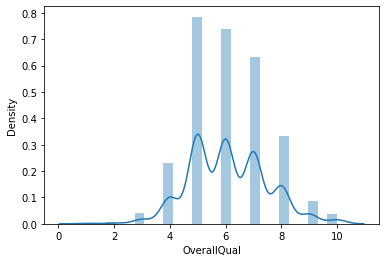

In [51]:
sns.distplot(df_train['OverallQual'])

In [61]:
SalePrice_upper_limit = df_train['SalePrice'].mean() + df_train['SalePrice'].std()*4
SalePrice_lower_limit = df_train['SalePrice'].mean() - df_train['SalePrice'].std()*4
df_train['SalePrice'][(df_train['SalePrice']>SalePrice_upper_limit) | (df_train['SalePrice']<SalePrice_lower_limit)]

178    501837.00
440    555000.00
691    755000.00
769    538000.00
803    582933.00
898    611657.00
1046   556581.00
1169   625000.00
1182   745000.00
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

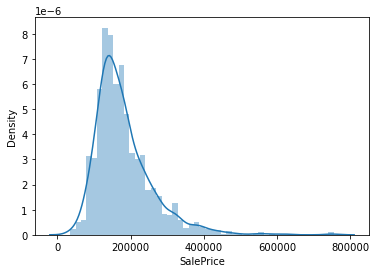

In [53]:
sns.distplot(df_train['SalePrice'])

<AxesSubplot:xlabel='SalePrice'>

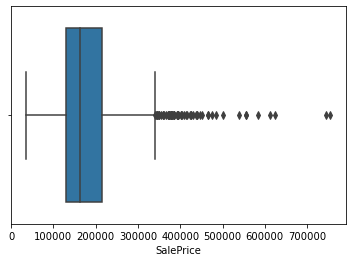

In [54]:
sns.boxplot(df_train['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>

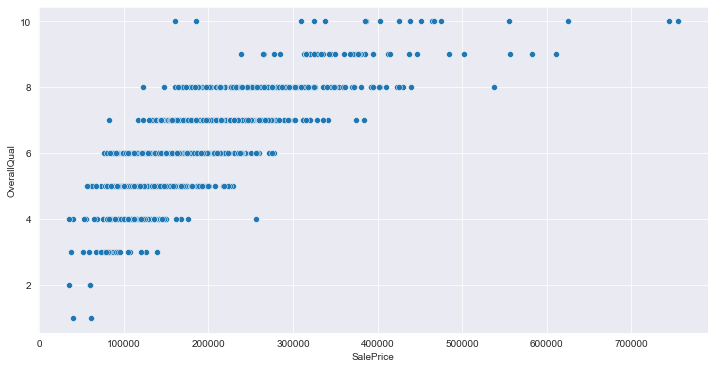

In [56]:
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')
sns.scatterplot(x='SalePrice', y='OverallQual', data=df_train)

In [62]:
print('SalePrice_upper_limit:', SalePrice_upper_limit)
print('SalePrice_lower_limit:', SalePrice_lower_limit)

SalePrice_upper_limit: 498691.2074219575
SalePrice_lower_limit: -136848.8156411356


In [63]:
clean_data = df_train[(df_train['OverallQual'] < OverallQual_upper_limit) & 
                      (df_train['OverallQual'] > OverallQual_lower_limit) &
                      (df_train['SalePrice'] < SalePrice_upper_limit) & 
                      (df_train['SalePrice'] > SalePrice_lower_limit)]
clean_data.shape

(1449, 232)

## Standardization

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()
Z = scaler.fit_transform(clean_data)

In [68]:
abs(pd.DataFrame(Z).describe())

,0,1,2,3,4,5,6,7,8,9,...,222,223,224,225,226,227,228,229,230,231
count,1449.00,1449.00,1449.00,1449.00,1449.00,1449.00,1449.00,1449.00,1449.00,1449.00,...,1449.00,1449.00,1449.00,1449.00,1449.00,1449.00,1449.00,1449.00,1449.00,1449.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,0.87,2.24,0.92,3.03,3.24,3.29,1.69,0.98,0.29,1.29,...,0.06,0.06,0.30,0.05,2.58,0.05,0.09,0.12,2.15,0.30
25%,0.87,0.45,0.29,0.80,0.53,0.57,0.86,0.98,0.29,0.78,...,0.06,0.06,0.30,0.05,0.39,0.05,0.09,0.12,0.46,0.30
50%,0.17,0.01,0.10,0.06,0.53,0.03,0.40,0.13,0.29,0.20,...,0.06,0.06,0.30,0.05,0.39,0.05,0.09,0.12,0.46,0.30
75%,0.31,0.42,0.11,0.68,0.38,0.96,0.93,0.60,0.29,0.55,...,0.06,0.06,0.30,0.05,0.39,0.05,0.09,0.12,0.46,0.30
max,3.14,11.13,20.65,2.90,3.09,1.29,1.22,11.63,8.85,4.02,...,16.99,16.99,3.36,21.95,0.39,19.01,10.94,8.45,0.46,3.31


In [85]:
Z_OverallQual = scaler.fit_transform(pd.DataFrame(clean_data['OverallQual']))
Z_SalePrice = scaler.fit_transform(pd.DataFrame(clean_data['SalePrice']))

## Linear Regression

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [95]:
p_train, p_test, q_train, q_test = train_test_split(Z_OverallQual, Z_SalePrice, test_size = 0.2, random_state = 42)

In [96]:
model_lr = LinearRegression()
model_lr.fit(p_train, q_train)

LinearRegression()

In [98]:
pred_lr = model_lr.predict(p_test)

In [99]:
r2_score(q_test, pred_lr)

0.569056585256676

In [100]:
model_lr.coef_

array([[0.8222638]])

In [101]:
model_lr.intercept_

array([0.01849598])

In [103]:
print('MAE :', mean_absolute_error(q_test, pred_lr))
print('MSE :', mean_squared_error(q_test, pred_lr))
print('RMSE :', np.sqrt(mean_squared_error(q_test, pred_lr)))

MAE : 0.4575830809490199
MSE : 0.34956197338880446
RMSE : 0.5912376623565218


## Linear Regression Multiple Variables

In [111]:
zdf = pd.DataFrame(Z)
zdf.head()

,0,1,2,3,4,5,6,7,8,9,...,222,223,224,225,226,227,228,229,230,231
0,0.07,-0.22,-0.20,0.68,-0.53,1.06,0.88,0.60,-0.29,-0.95,...,-0.06,-0.06,-0.30,-0.05,0.39,-0.05,-0.09,-0.12,0.46,-0.30
1,-0.87,0.46,-0.09,-0.06,2.18,0.16,-0.43,1.21,-0.29,-0.64,...,-0.06,-0.06,-0.30,-0.05,0.39,-0.05,-0.09,-0.12,0.46,-0.30
2,0.07,-0.09,0.08,0.68,-0.53,0.99,0.83,0.11,-0.29,-0.30,...,-0.06,-0.06,-0.30,-0.05,0.39,-0.05,-0.09,-0.12,0.46,-0.30
3,0.31,-0.45,-0.09,0.68,-0.53,-1.86,-0.72,-0.50,-0.29,-0.06,...,-0.06,-0.06,-0.30,-0.05,0.39,-0.05,-0.09,-0.12,-2.15,-0.30
4,0.07,0.65,0.38,1.42,-0.53,0.96,0.74,0.48,-0.29,-0.17,...,-0.06,-0.06,-0.30,-0.05,0.39,-0.05,-0.09,-0.12,0.46,-0.30


In [105]:
zdf.shape

(1449, 232)

In [106]:
clean_data.shape

(1449, 232)

In [112]:
zdf.columns = clean_data.columns
zdf.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.07,-0.22,-0.20,0.68,-0.53,1.06,0.88,0.60,-0.29,-0.95,...,-0.06,-0.06,-0.30,-0.05,0.39,-0.05,-0.09,-0.12,0.46,-0.30
1,-0.87,0.46,-0.09,-0.06,2.18,0.16,-0.43,1.21,-0.29,-0.64,...,-0.06,-0.06,-0.30,-0.05,0.39,-0.05,-0.09,-0.12,0.46,-0.30
2,0.07,-0.09,0.08,0.68,-0.53,0.99,0.83,0.11,-0.29,-0.30,...,-0.06,-0.06,-0.30,-0.05,0.39,-0.05,-0.09,-0.12,0.46,-0.30
3,0.31,-0.45,-0.09,0.68,-0.53,-1.86,-0.72,-0.50,-0.29,-0.06,...,-0.06,-0.06,-0.30,-0.05,0.39,-0.05,-0.09,-0.12,-2.15,-0.30
4,0.07,0.65,0.38,1.42,-0.53,0.96,0.74,0.48,-0.29,-0.17,...,-0.06,-0.06,-0.30,-0.05,0.39,-0.05,-0.09,-0.12,0.46,-0.30


In [120]:
X = zdf.drop(['SalePrice'], axis=1)
Y = clean_data['SalePrice']

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [122]:
model_lrm = LinearRegression()
model_lrm.fit(X_train, Y_train)

LinearRegression()

In [123]:
pred_lrm = model_lrm.predict(X_test)

In [124]:
r2_score(Y_test, pred_lrm)

-9.8456945577695e+22

In [125]:
print('MAE :', mean_absolute_error(Y_test, pred_lrm))
print('MSE :', mean_squared_error(Y_test, pred_lrm))
print('RMSE :', np.sqrt(mean_squared_error(Y_test, pred_lrm)))

MAE : 2110376095707873.0
MSE : 4.1122288182547384e+32
RMSE : 2.0278631162518684e+16


## Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
model_logreg = LogisticRegression()
model_logreg.fit(X_train, Y_train)

LogisticRegression()

In [128]:
pred_logreg = model_logreg.predict(X_test)

In [129]:
r2_score(Y_test, pred_logreg)

0.5624025815773387

In [130]:
print("Training score: ",model_logreg.score(X_train, Y_train))
print("Testing score: ",model_logreg.score(X_test, Y_test))

Training score:  0.999137187230371
Testing score:  0.020689655172413793
